# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
%matplotlib inline

# Loading the Data

In [2]:
tweets = pd.read_csv('Tweets.csv')

In [3]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

Lets check the shape of the dataset.

In [5]:
tweets.shape

(14640, 15)

## Handling Missing Values

Check the number of null values in each column.

In [6]:
print("The number of null values in each column\n", tweets.isna().sum())

The number of null values in each column
 tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


Lets calculate the percentage of nulls or NA values in each column

In [7]:
def missing_percentage(df):
    """This function takes the DataFrame(df) as input and returns two columns, total missing values and percentage of 
        total missing values"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

missing_percentage(tweets)

,Total,Percent
negativereason_gold,14608,99.78
airline_sentiment_gold,14600,99.73
tweet_coord,13621,93.04
negativereason,5462,37.31
user_timezone,4820,32.92
tweet_location,4733,32.33
negativereason_confidence,4118,28.13
tweet_created,0,0.00
text,0,0.00
retweet_count,0,0.00


- From above above table we can see that columns like **negativereason_gold, airline_sentiment_gold, tweet_coord** has more than 90% null values.<br>It will be better to delete these columns as they will not provide any constructive information.

In [8]:
del tweets['tweet_coord']
del tweets['airline_sentiment_gold']
del tweets['negativereason_gold']
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Data Exploration and Visualization

Lets find out the total number of airline sentiments are there in the data.<br>
Then, calculate the total number of tweets for each airline.

In [9]:
mood_count = tweets['airline_sentiment'].value_counts()
mood_count

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

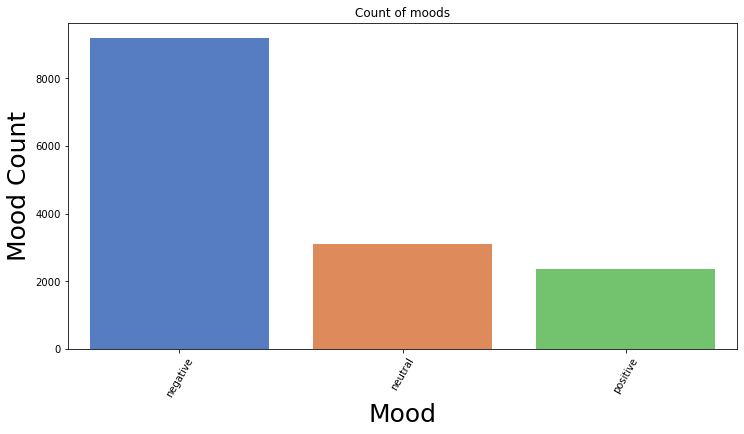

In [10]:
plt.figure(figsize = (12, 6))
Index = [0, 1, 2]
sns.barplot(Index, mood_count, palette = "muted", saturation = 0.8)
plt.xticks(Index, ['negative', 'neutral', 'positive'], rotation = 60)
plt.ylabel('Mood Count', fontsize = 25)
plt.xlabel('Mood', fontsize = 25)
plt.title('Count of moods')
plt.show()

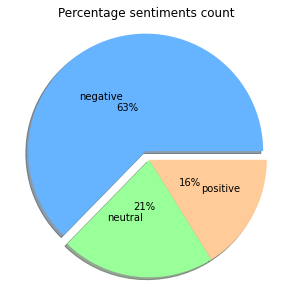

In [11]:
fig, ax = plt.subplots(figsize = (5,5))
labels = ['negative', 'neutral', 'positive']
explode = (0.08, 0, 0)
colors = ['#66b3ff','#99ff99','#ffcc99']
ax.pie(tweets.airline_sentiment.value_counts(), explode = explode, labels = labels,  
       colors = colors, autopct = '%1.0f%%', 
       shadow = True, startangle = 0,   
       pctdistance = 0.4,labeldistance = 0.5)
ax.axis('equal')
ax.set_title('Percentage sentiments count', loc = 'center', pad = 0.2)
plt.show()

- In the dataset, most of the review present here are **negative**.<br>
- From the pie-chart, you can see that the majority of the tweets are negative (63%), followed by neutral tweets (21%), and then the positive tweets (16%).

In [12]:
print("Number of tweets for each airline\n",tweets['airline'].value_counts())

Number of tweets for each airline
 United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64


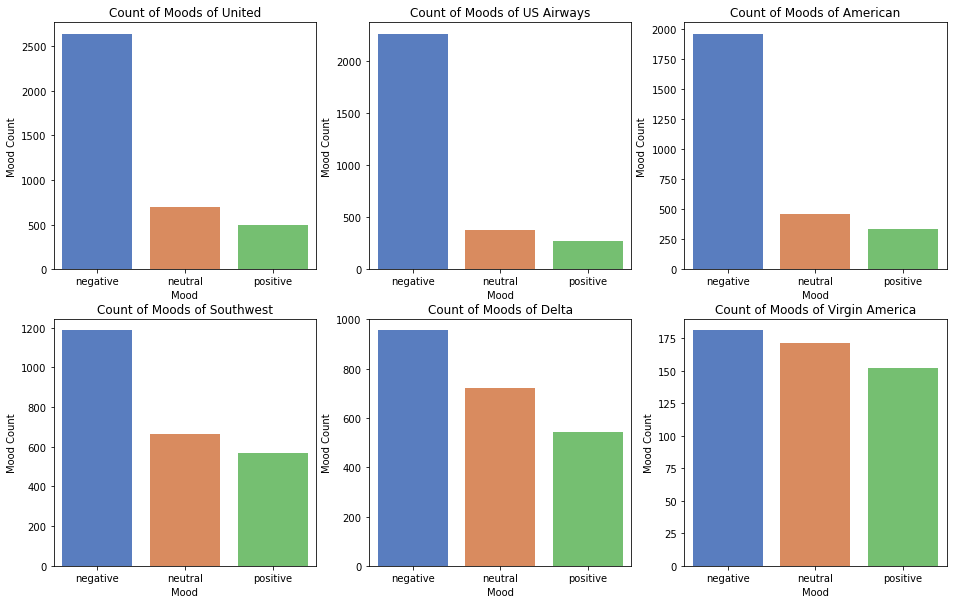

In [13]:
airlines= ['United', 'US Airways', 'American', 'Southwest', 'Delta', 'Virgin America']
plt.figure(1, figsize = (16, 10))
for i in airlines:
    indices = airlines.index(i)
    plt.subplot(2, 3, indices + 1)
    new_df = tweets[tweets['airline'] == i]
    count = new_df['airline_sentiment'].value_counts()
    Index = [0, 1, 2]
    sns.barplot(Index, count, palette = "muted")
    plt.xticks(Index, ['negative', 'neutral', 'positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of ' + i)

- From the above plots one can find the distribution of moods for each airline.
- We can see that the airlines **United, US Airways, American** has more negative reactions compare to neutral and positive.
- The moods distibuted for airline **Virgin America** are the most balanced.

Now, check for the negative reasons and their count.<br>
After that check counts of reasons for each airline.

In [14]:
tweets['negativereason'].value_counts(sort = False)

Damaged Luggage                  74
Bad Flight                      580
longlines                       178
Can't Tell                     1190
Flight Booking Problems         529
Customer Service Issue         2910
Lost Luggage                    724
Flight Attendant Complaints     481
Late Flight                    1665
Cancelled Flight                847
Name: negativereason, dtype: int64

In [15]:
def NR_Count(Airline):
    if Airline == 'All':
        df = tweets
    else:
        df = tweets[tweets['airline'] == Airline]
    count = dict(df['negativereason'].value_counts())
    unique_reasons = list(tweets['negativereason'].unique())
    unique_reasons =[x for x in unique_reasons if str(x) != 'nan']
    reasons_dataframe = pd.DataFrame({'Reasons' : unique_reasons})
    reasons_dataframe['count'] = reasons_dataframe['Reasons'].apply(lambda x: count[x])
    return reasons_dataframe

In [16]:
def plot_reason(Airline):
    df = NR_Count(Airline)
    count = df['count']
    Index = [int(i) for i in range(0,(len(df)))]
    chart = sns.barplot(Index, count, palette = "deep")
    plt.xticks(Index,df['Reasons'], rotation = 90)
    plt.ylabel('Count', fontsize = 18)
    plt.xlabel('Reason', fontsize = 18)
    plt.title('Count of Reasons for ' + Airline, fontsize = 24)

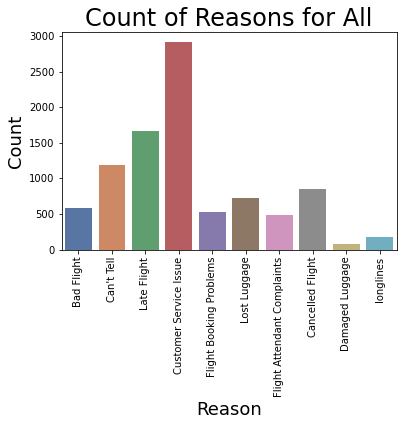

In [17]:
plot_reason('All')

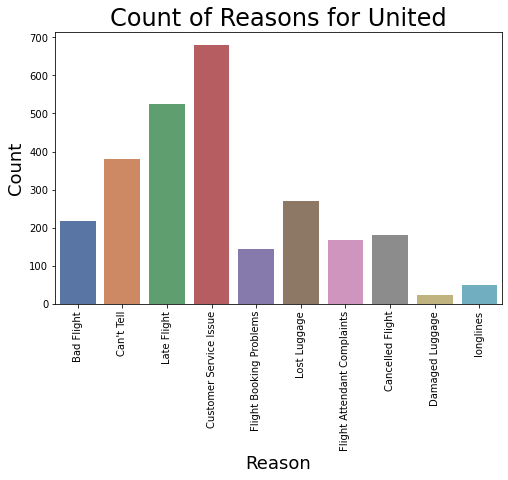

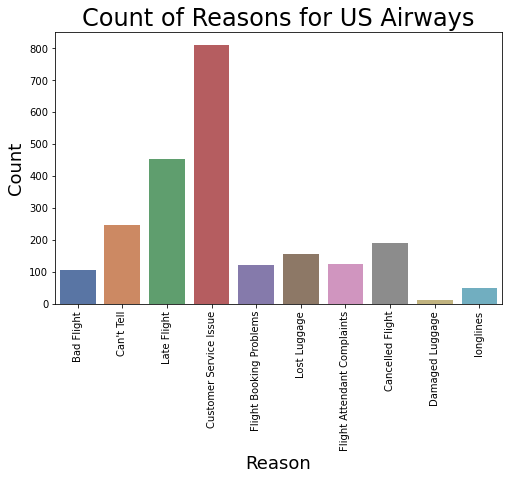

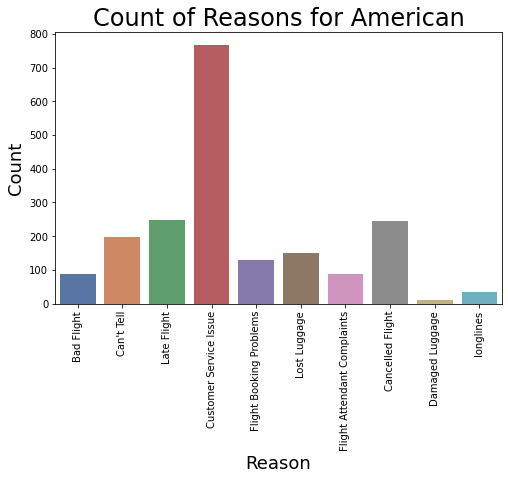

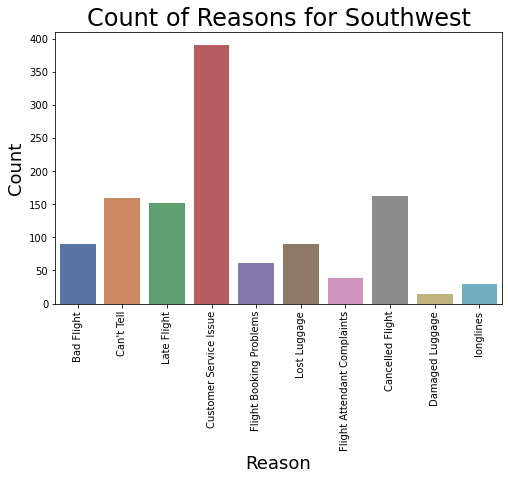

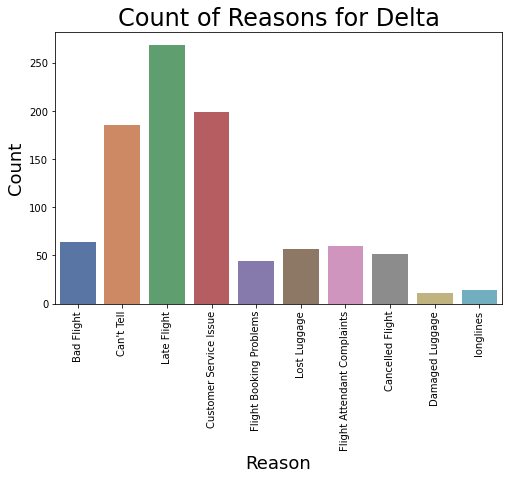

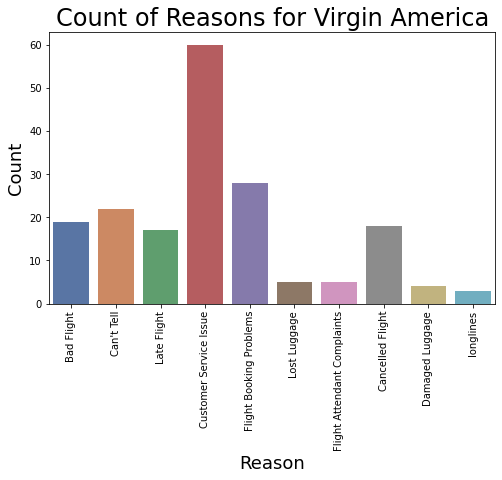

In [18]:
airlines= ['United', 'US Airways', 'American', 'Southwest', 'Delta', 'Virgin America']
for i in range(len(airlines)):
    fig = plt.subplots(figsize = (8, 5))
    chart = plot_reason(airlines[i])
    plt.show()

- Customer Service Issue is the main negative reason for US Airways, United, American, Southwest, Virgin America.
- Late Flight is the main negative reason for Delta.
- Interestingly, Virgin America has the least count of negative reasons (all less than 60).
- Airlines like US Airways, United, American have more than 500 negative reasons (Late flight, Customer Service Issue).

Let's view the average confidence level for the tweets belonging to three sentiment categories.

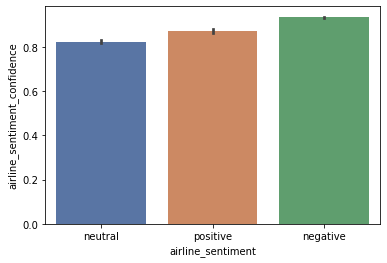

In [19]:
sns.barplot(x = 'airline_sentiment', y = 'airline_sentiment_confidence' , data = tweets, palette = "deep")

- From the barplot, you can see that the confidence level for negative tweets is higher compared to positive and neutral tweets.

## Most used words in negative and positive tweets

The goal is to get an idea of most frequent words in negative and positive tweets using *Wordcloud*.<br>
- ***Wordcloud*** is a great tool for visualizing nlp data. The larger the words in the wordcloud image , the more is the frequency of that word in our text data.

In [20]:
from wordcloud import WordCloud, STOPWORDS

### Wordcloud for negative tweets

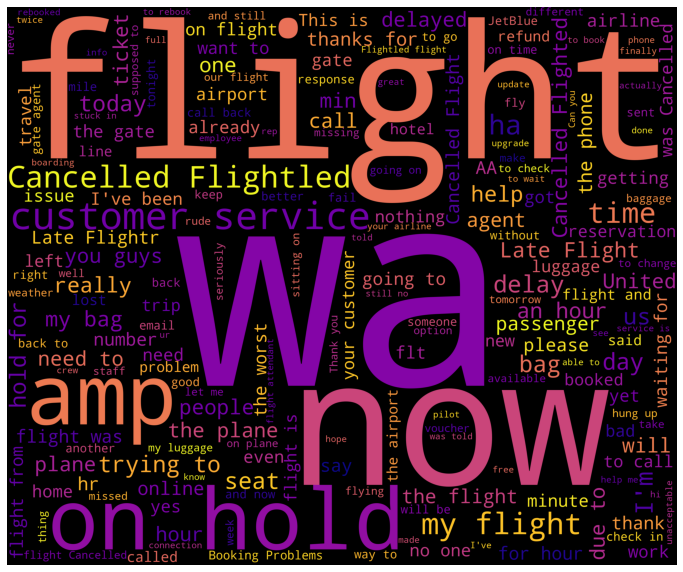

In [21]:
new_df = tweets[tweets['airline_sentiment'] == 'negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word 
                         and not word.startswith('@') 
                         and word != 'RT'])

wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color = 'black',
                      width = 3000, height = 2500, colormap = 'plasma').generate(cleaned_word)
plt.figure(1, figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

- We can find that the Tweets with negative moods are frequently involved some words like cancelled, flight ,customer or on hold. Customers tends to complain when they are waiting for the delayed flights.

### Wordcloud for positive tweets

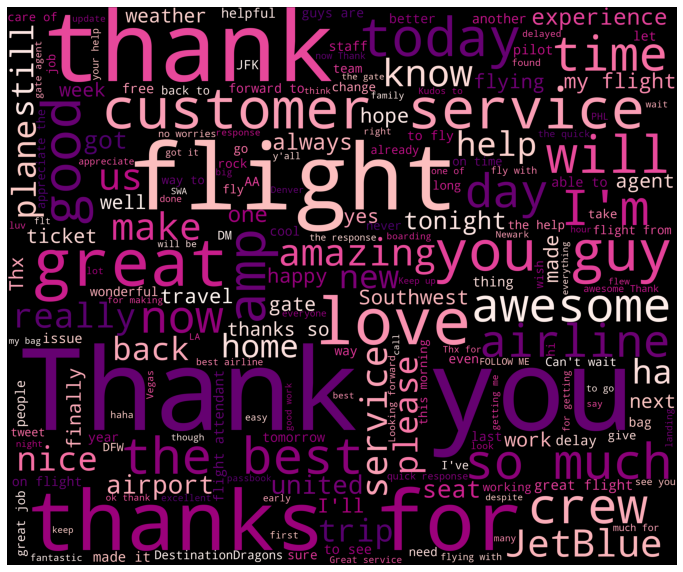

In [22]:
new_df = tweets[tweets['airline_sentiment'] == 'positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word 
                         and not word.startswith('@') 
                         and word != 'RT'])

wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color = 'black',
                      width = 3000, height = 2500, colormap = 'RdPu').generate(cleaned_word)
plt.figure(1, figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

- We can find that the Tweets with positive moods are frequently involved some words like Thank, you, great or crew.

Now, lets find out how many tweets are done from various timezones.

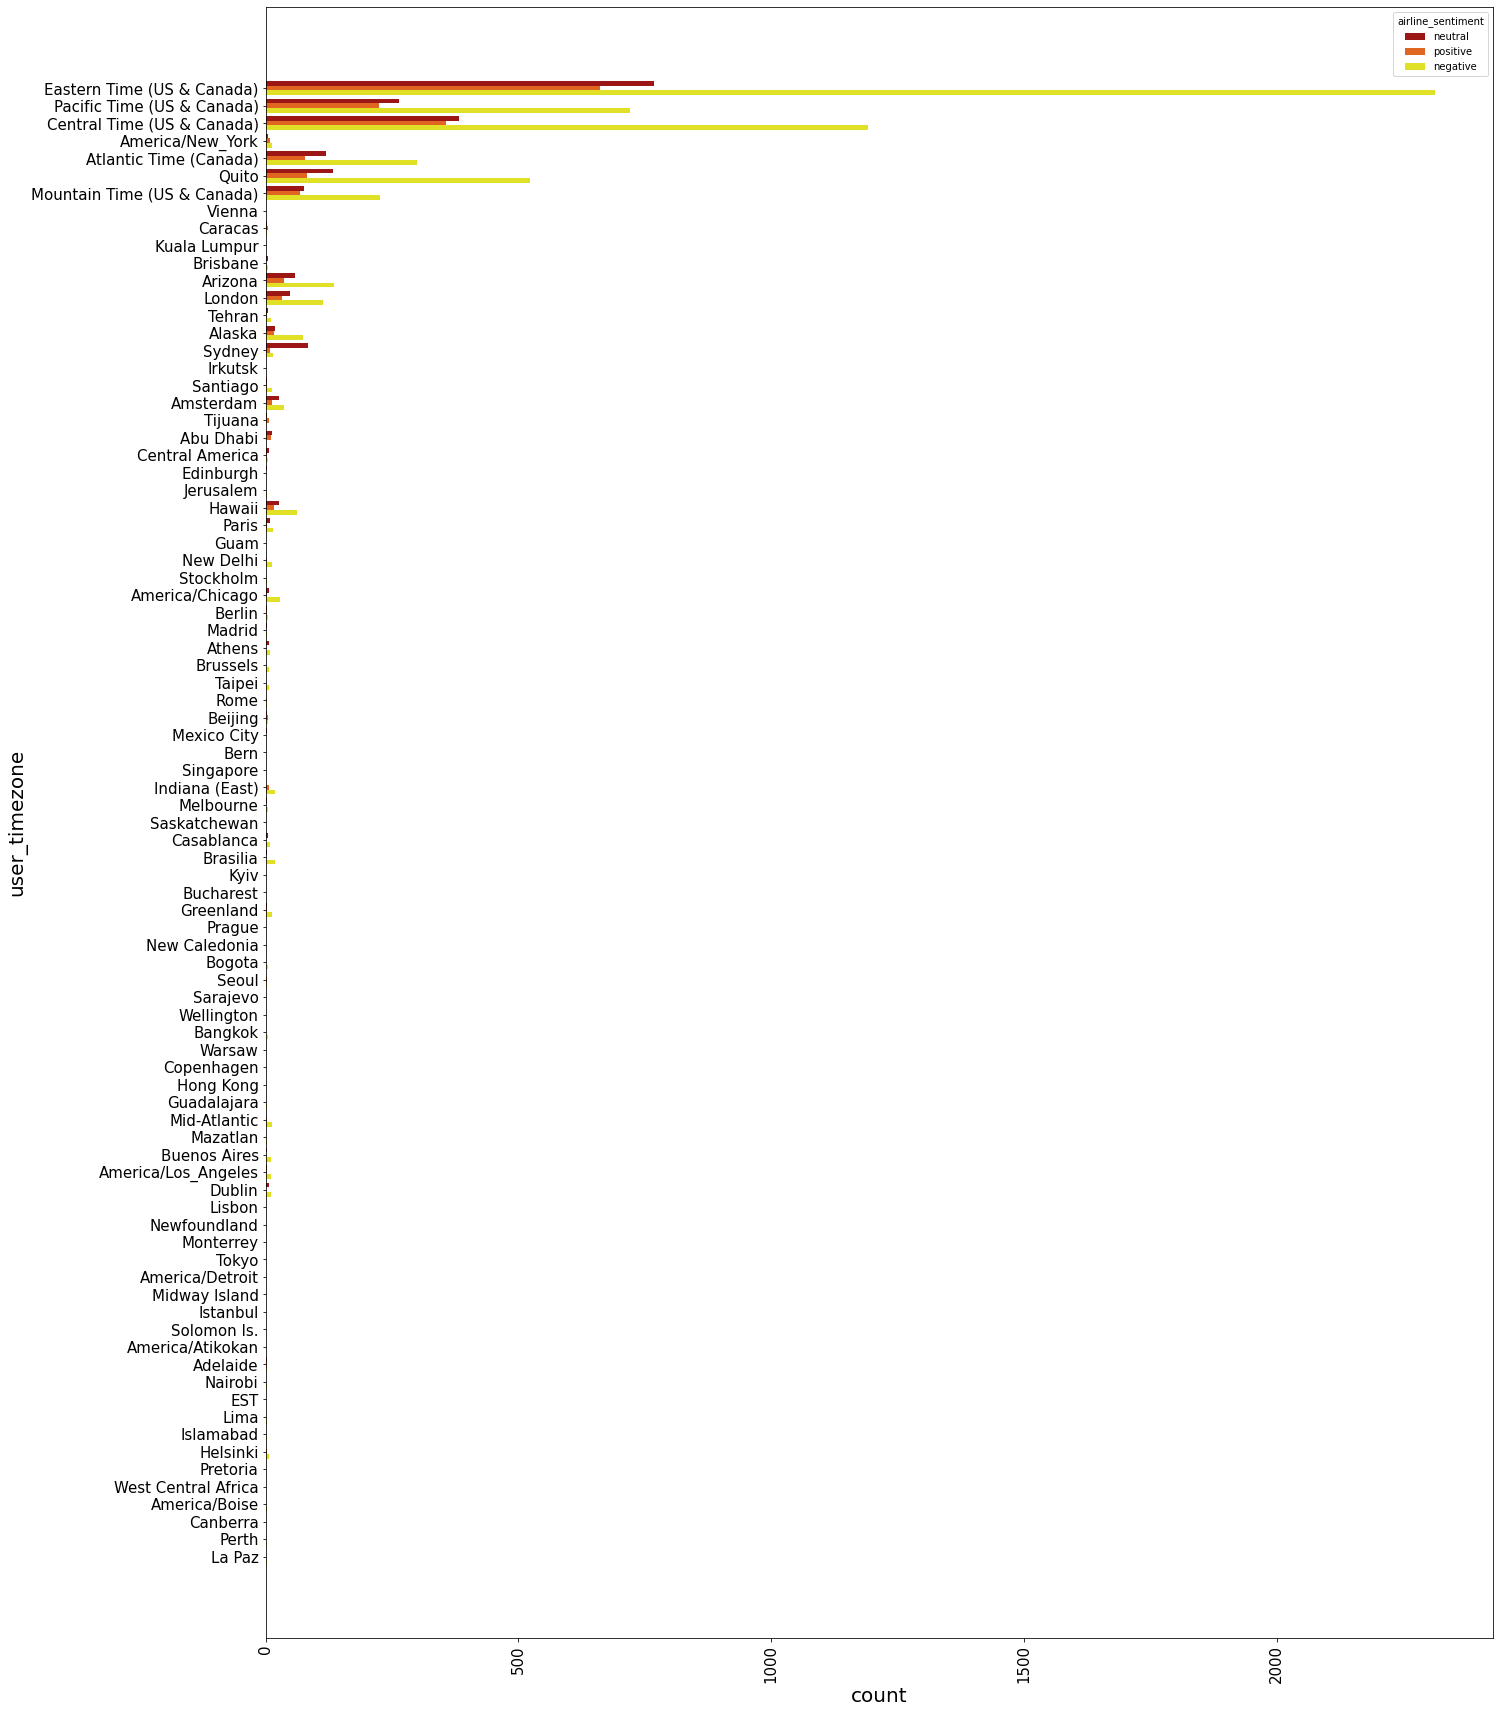

In [23]:
figsize=(22, 30)
ticksize = 15
titlesize = ticksize + 8
labelsize = ticksize + 5
xlabel = "Airlines"
ylabel = "Count"
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

sns.countplot(y = tweets['user_timezone'], hue = tweets['airline_sentiment'], palette = 'hot')
plt.xticks(rotation = 90)
plt.plot()
plt.show()

- This shows that, Eastern Time (US & Canada) timezone has maximun number of tweets.

In [24]:
tweets['tweet_created'] = pd.to_datetime(tweets['tweet_created']).dt.date

In [25]:
tweets['tweet_created']

0        2015-02-24
1        2015-02-24
2        2015-02-24
3        2015-02-24
4        2015-02-24
            ...    
14635    2015-02-22
14636    2015-02-22
14637    2015-02-22
14638    2015-02-22
14639    2015-02-22
Name: tweet_created, Length: 14640, dtype: object

### Relationship between negative sentiments and date

In [26]:
day_df = tweets.groupby(['tweet_created','airline','airline_sentiment']).size()
day_df.unstack()

airline_sentiment             negative  neutral  positive
tweet_created airline                                    
2015-02-16    Delta                1.0      1.0       NaN
              United               2.0      NaN       NaN
2015-02-17    Delta              108.0     86.0      69.0
              Southwest          213.0     85.0      86.0
              US Airways         233.0     30.0      48.0
              United             272.0     75.0      49.0
              Virgin America      12.0     21.0      21.0
2015-02-18    American             1.0      NaN       NaN
              Delta              105.0     86.0      77.0
              Southwest          110.0    106.0      76.0
              US Airways         244.0     32.0      41.0
              United             257.0     90.0      59.0
              Virgin America      19.0     21.0      20.0
2015-02-19    American             NaN      NaN       1.0
              Delta              135.0     70.0      78.0
              Southwest          127.0     94.0      96.0
              US Airways         193.0     54.0      32.0
              United             272.0     85.0      69.0
              Virgin America      24.0     26.0      20.0
2015-02-20    American             1.0      NaN       NaN
              Delta               91.0     90.0      70.0
              Southwest          132.0    110.0      77.0
              US Airways         248.0     52.0      33.0
              United             342.0     99.0      85.0
              Virgin America      21.0     32.0      17.0
2015-02-21    American             1.0      NaN       NaN
              Delta               98.0     79.0      66.0
              Southwest          257.0     60.0      53.0
              US Airways         291.0     39.0      30.0
              United             365.0     88.0      53.0
              Virgin America      37.0     12.0      28.0
2015-02-22    American           762.0    132.0      94.0
              Delta              255.0     76.0      77.0
              Southwest          129.0     77.0      73.0
              US Airways         561.0     60.0      27.0
              United             532.0    102.0      69.0
              Virgin America      27.0     16.0      10.0
2015-02-23    American           826.0    178.0     137.0
              Delta              125.0    195.0      71.0
              Southwest          116.0     83.0      77.0
              US Airways         372.0     74.0      42.0
              United             449.0    109.0      83.0
              Virgin America      31.0     37.0      23.0
2015-02-24    American           369.0    153.0     104.0
              Delta               37.0     40.0      36.0
              Southwest          102.0     49.0      32.0
              US Airways         121.0     40.0      16.0
              United             142.0     49.0      25.0
              Virgin America      10.0      6.0      13.0

- This shows the sentiments of tweets for each date from 2015-02-16 to 2015-02-24 for every airline in our dataframe.

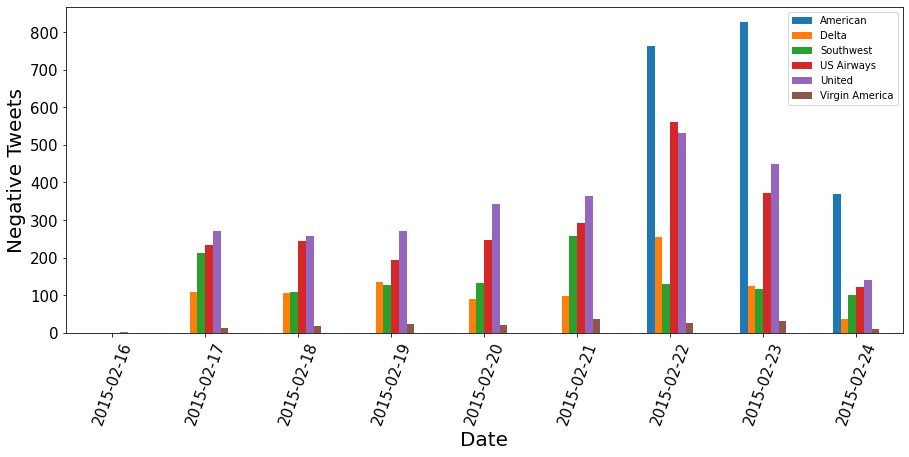

In [27]:
day_df = day_df.loc(axis = 0)[:,:, 'negative']
ax2 = day_df.groupby(['tweet_created', 'airline']).sum().unstack().plot(kind = 'bar', figsize = (15, 6), rot = 70)
labels = ['American', 'Delta', 'Southwest', 'US Airways', 'United', 'Virgin America']
ax2.legend(labels = labels)
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative Tweets')
plt.show()

- There is a sudden increase in negative sentimental tweets for American started fromm 2015-02-22 and which reduced by half in next two days, 2015-05-24.
- Virgin America has the least number of negative tweets throughout the data. 
- It should be noted that the total number of tweets for Virgin America was also significantly less as compared to the rest of airlines.

In [28]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada)


# Data Cleaning

In [29]:
tweets['text'].sample(20)

12219    “@AmericanAir: Bet these birds wish they'd flo...
1647     @united now maintenance issues with flight 563...
11791    @USAirways thank you! I tried that and they sa...
3207     @united I'm in Denver, my bag is in San Jose. ...
2378     @united correct?  What's correct?  Sorry I'm lost
14216    @AmericanAir Flight's Cancelled Flightled. Web...
8042     @JetBlue OOH! Good one! Speaking of #MiAmore -...
5528     @SouthwestAir here we go again. Delayed in Chi...
584      @united as a 1k, I'm always hoping for improve...
8041     This is so smart it makes me angry MT @JetBlue...
9391     @USAirways Don't blame it on weather. Rep at c...
6108     @SouthwestAir I had to travel to Savannah, GA,...
1746     @united any way you can help me find a flight ...
649      @united I wonder if sharing all this on FB and...
10059    @USAirways are the bags off Flight 1898 CLT to...
2467     @united no announcement re extra baggage, "fin...
10493    @USAirways comin in clutch and sending me to C.

In [30]:
tweet_text = tweets['text'].copy()

In [31]:
tweet_text[608]

"@United. What's going on with UA 236?  outbound flight last thurs was delayed 4hrs How long will this delay be? #worst2unitedflightsever"

In [32]:
from nltk.corpus import stopwords
def tweet_to_words(raw_tweet):
    # remove the hashtags
    remove_hashtags = ' '.join(re.sub("(#[A-Za-z0-9]+)", " ", raw_tweet).split())
    # remove tweet account name
    remove_usernames = ' '.join(re.sub("r'@\w+'", " ", remove_hashtags).split())
    #remove website urls
    remove_ulrs = ' '.join(re.sub(r'http\S+', ' ',remove_usernames).split())
    # remove numbers
    letters_only = re.sub("[^a-zA-Z]", " ", remove_ulrs) 
    #remove whitespace
    rem_whitespace = re.sub(r'\s+', " ", remove_ulrs).split()
    # convert words into lowercase
    words = letters_only.lower().split() 
    # STOPWORDS list
    stops = set(stopwords.words("english"))        
    # remove stopwords
    meaningful_words = [w for w in words if not w in stops]
    return( " ".join( meaningful_words )) 

In [33]:
tweet_to_words(tweet_text[608])

'united going ua outbound flight last thurs delayed hrs long delay'

In [34]:
def clean_tweet_length(raw_tweet):
    # remove the hashtags
    remove_hashtags = ' '.join(re.sub("(#[A-Za-z0-9]+)", " ", raw_tweet).split())
    # remove tweet account name
    remove_usernames = ' '.join(re.sub("r'@\w+'", " ", remove_hashtags).split())
    #remove website urls
    remove_ulrs = ' '.join(re.sub(r'http\S+', ' ',remove_usernames).split())
    # remove numbers
    letters_only = re.sub("[^a-zA-Z]", " ", remove_ulrs) 
    #remove whitespace
    rem_whitespace = re.sub(r'\s+', " ", remove_ulrs).split()
    # convert words into lowercase
    words = letters_only.lower().split() 
    # STOPWORDS list
    stops = set(stopwords.words("english"))        
    # remove stopwords
    meaningful_words = [w for w in words if not w in stops]
    return(len(meaningful_words)) 

In [35]:
tweets['clean_tweet'] = tweet_text.apply(lambda x: tweet_to_words(x))
tweets['Tweet_length'] = tweet_text.apply(lambda x: clean_tweet_length(x))

In [36]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,clean_tweet,Tweet_length
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada),virginamerica dhepburn said,3
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada),virginamerica plus added commercials experienc...,6
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada),virginamerica today must mean need take anothe...,8
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada),virginamerica really aggressive blast obnoxiou...,11
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada),virginamerica really big bad thing,5


In [37]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(tweets, test_size = 0.2, random_state = 42)

In [38]:
train_clean_tweet = []
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)

test_clean_tweet = []
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
train_features = vector.fit_transform(train_clean_tweet)
test_features = vector.transform(test_clean_tweet)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [41]:
Classifiers = [
    LogisticRegression(C = 0.000000001, solver = 'liblinear', max_iter = 200),
    KNeighborsClassifier(3),
    SVC(kernel = "rbf", C = 0.025, probability = True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators = 200),
    AdaBoostClassifier(),
    GaussianNB()]

In [42]:
dense_features = train_features.toarray()
dense_test = test_features.toarray()
Accuracy = []
Model = []
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features, train['airline_sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features, train['airline_sentiment'])
        pred = fit.predict(dense_test)
    # To calculate accuracy 
    accuracy = accuracy_score(pred, test['airline_sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of ' + classifier.__class__.__name__ + ' is ' + str(accuracy))  

Accuracy of LogisticRegression is 0.6451502732240437
Accuracy of KNeighborsClassifier is 0.6687158469945356
Accuracy of SVC is 0.6577868852459017
Accuracy of DecisionTreeClassifier is 0.6772540983606558
Accuracy of RandomForestClassifier is 0.7663934426229508
Accuracy of AdaBoostClassifier is 0.7431693989071039
Accuracy of GaussianNB is 0.36851092896174864


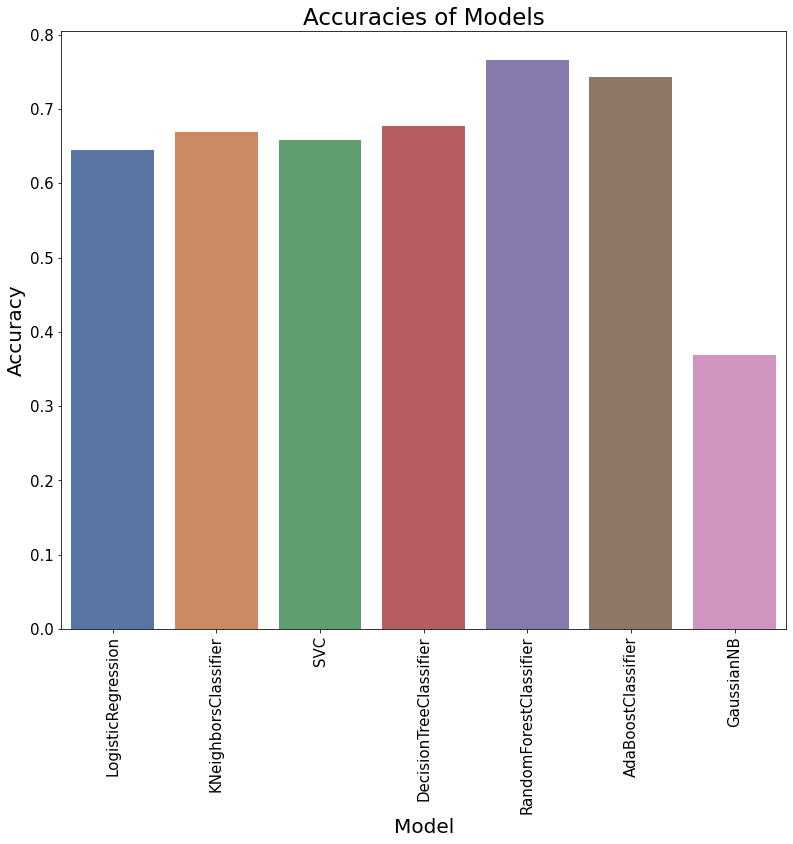

In [43]:
plt.figure(figsize = (13, 11))
Index = [0, 1, 2, 3, 4, 5, 6]
sns.barplot(Index, Accuracy, palette = "deep")
plt.xticks(Index, Model, rotation = 90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')
plt.show()

- Random Forest Classifier model has the highest accuracy compared to other models.<br>
Lets plot the confusion matrix for the Random Forest Classifier.

Accuracy of RandomForestClassifier is 0.7646857923497268
              precision    recall  f1-score   support

    negative       0.93      0.80      0.86      2188
     neutral       0.40      0.61      0.48       383
    positive       0.56      0.72      0.63       357

    accuracy                           0.76      2928
   macro avg       0.63      0.71      0.66      2928
weighted avg       0.81      0.76      0.78      2928



<Figure size 1584x2160 with 0 Axes>

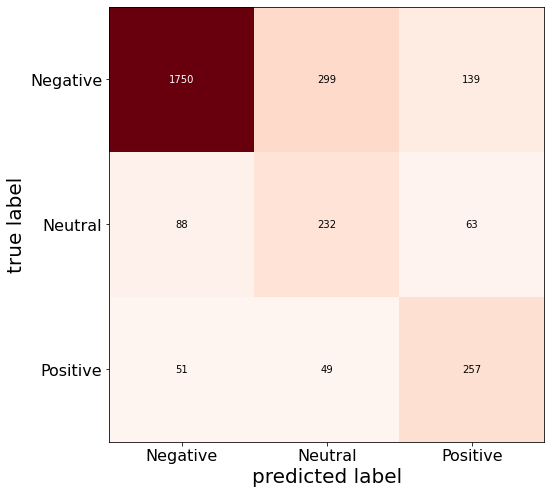

In [44]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
randforest_classifier = RandomForestClassifier(n_estimators = 200)
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
try:
    fit = randforest_classifier.fit(train_features,train['airline_sentiment'])
    pred = fit.predict(test_features)
except Exception:
    fit = randforest_classifier.fit(dense_features,train['airline_sentiment'])
    pred = fit.predict(dense_test)
accuracy = accuracy_score(pred,test['airline_sentiment'])
Accuracy.append(accuracy)
Model.append(randforest_classifier.__class__.__name__)
print('Accuracy of '+ randforest_classifier.__class__.__name__ +' is ' + str(accuracy))
print(classification_report(pred, test['airline_sentiment']))
cm = confusion_matrix(pred, test['airline_sentiment'])
plt.figure()
plot_confusion_matrix(cm,figsize = (12, 8), hide_ticks = True, cmap = plt.cm.Reds)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize = 16, color = 'black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize = 16)
plt.show()

- As we can see above we have plotted the confusion matrix for predicted sentiments and actual sentiments (negative,neutral and positive)